In [26]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [27]:
N = 1000
aem = 1.67e-27
q = 1.6e-19
epsilon_0 = 8.85e-14
p = 0.005

el = 1.6e-19
Nat = 4.42e22
q2 = 14.4
Ge_m = 72.59
Ge_z = 32
m2 = 72.59
z2 = Ge_z

As_m = 74.92
As_z = 33
m1 = As_m
z1 = As_z
E = 120000
Q = 1e15


a0 = 0.528
a1 = 1.383
b1 = 0.01321
c1 = 0.21226
d1 = 0.19593

In [31]:
# Thomas-Fermi model
a = 0.8854 * a0 / (z1 ** 0.66 + z2 ** 0.66) ** 0.5
eps = (a * m2 * E) / (z1 * z2 * q2 * (m1 + m2))

if eps < 10:
    sn_0 = mt.log(1 + a1 * eps) / \
        (2 * (eps + b1 * eps ** c1 + d1 * eps ** 0.5))
else:
    sn_0 = mt.log(eps) / (2 * eps)

Sn = (8.462E-15 * z1 * z2 * m1 * sn_0 * Nat) / ((m1 + m2) *
                                          (z1 ** 0.23 + z2 ** 0.23))

k1 = z1 ** (1 / 6) * 0.0793 * z1 ** (1 / 2) * (m1 + m2) ** (3 / 2) / ((z1 ** (2 / 3) + z2 ** (2 / 3)) ** (3 / 4) * m1 ** (3 / 2) * m2 ** (1 / 2))

Cr = (4 * 3.1416 * a ** 2 * m1 * m2) / (m1 + m2) ** 2
Ce = (4 * 3.1416 * a * m2) / (z1 * z2 * q2 * (m1 + m2))

Se = k1 * (Cr / 1e16) * (E ** 2) * Nat / (Ce ** 0.5)

In [32]:
dE = E / N

Rp = np.zeros(N + 1)
Csi = np.zeros(N + 1)
dRpl = np.zeros(N + 1)

for i in range(1, N + 1):
    Rp[i] = Rp[i-1] * (1 - m2 * Sn * dE / (2 * m1 * (Se + Sn) * i)) + dE / (Se + Sn)
    
    # Rp[i] = Rp[i - 1] + (1 - (m2 / m1) * (Sn / (Sn + Se)) * (dE / E)) * (dE / (Sn + Se))
    
for i in range(1, N + 1):
    Csi[i] = Csi[i - 1] + (2 * Rp[i]  * dE / (Se + Sn))
    
for i in range(1, N + 1):
    dRpl[i] = dRpl[i - 1] ** 2 + (Csi[i] - 2 * dRpl[i - 1] ** 2) * m2 * Sn * dE / (m1 * (Sn + Se) * i)
    
   # dRpl[i] = (dRpl[i - 1] ** 2 + (Csi[i] - 2 * dRpl[i - 1] ** 2) * (m2 / m1) * (Sn / (Sn + Se)) * (dE / E)) ** 0.5


Sn 1852.150 эв/нм или 1.852 кэв/нм
Se 927958973.256 эв/нм или 927958.973 кэв/нм
Rp 0.000 мкм
dRp 0.000 мкм


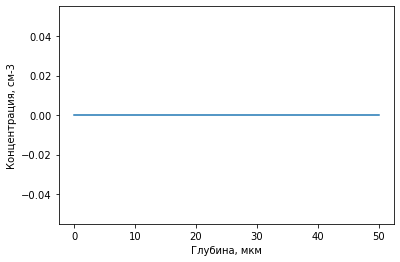

In [33]:
x1 = np.zeros(N + 1)
dRp = (Csi[N] - Rp[N] ** 2 - dRpl[N] ** 2) ** 0.5

x2 = np.zeros(N + 1)

dx = p / N

x1[0] = 0
x2[0] = 0

for i in range(1, N + 1):
    x1[i] = x1[i - 1] + dx
    x2[i] = x1[i] / 1e-4  # mkm

C = np.zeros(N + 1)

for i in range(1, N):
    C[i] = Q / ((2 * 3.14) ** 0.5 * dRp) * mt.exp(-(x1[i] - Rp[N]) ** 2 / (2 * dRp ** 2))

print(f"Sn {Sn / 1e7:.3f} эв/нм или {Sn / 1e10:.3f} кэв/нм")
print(f"Se {Se / 1e7:.3f} эв/нм или {Se / 1e10:.3f} кэв/нм")
print(f"Rp {Rp[N] * 1e4:.3f} мкм")
print(f"dRp {dRp * 1e4:.3f} мкм")

plt.plot(x2, C)
plt.xlabel('Глубина, мкм')
plt.ylabel('Концентрация, см-3')
plt.show()

In [13]:
print(f"Sn {Sn / 1e7:.3f} эв/нм или {Sn / 1e10:.3f} кэв/нм")
print(f"Se {Se / 1e7:.3f} эв/нм или {Se / 1e10:.3f} кэв/нм")
print(f"Rp {Rp[N] * 1e4:.3f} мкм")

Sn 1865.661 эв/нм или 1.866 кэв/нм
Se 10214976.417 эв/нм или 10214.976 кэв/нм
Rp 0.000 мкм
